In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

Mounted at /content/drive


In [ ]:
#Libraries needed
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from  matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

#Data loading and preparation (see pre processing notebook)

In [ ]:
#helper function for all metrics needed for questions

def evaluateAndGetMyMetrics(myModel,testDataset,testDatasetLabels):

  y_pred=myModel.predict_classes(testDataset)
  print("Training Metrics")
  #accuracy
  plt.figure(figsize=(15,10))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # loss
  plt.figure(figsize=(15,10))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='lower left')
  plt.show()

  print("Test Metrics")
  print("Classification Report for Test Dataset")
  print(classification_report(testDatasetLabels, y_pred))

  print("Confusion Matrix")
  matrix = metrics.confusion_matrix(testY, y_pred)

  classes=[0,1,2]
  matrix_norm = np.around(matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(matrix_norm,
                      index = classes, 
                      columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [ ]:
#load images as numpy arrays
trainX=np.load('/content/drive/MyDrive/Colab Notebooks/trainX.npy')
valX=np.load('/content/drive/MyDrive/Colab Notebooks/valX.npy')
testX=np.load('/content/drive/MyDrive/Colab Notebooks/testX.npy')
print("train images shape",trainX.shape)
print("validation images shape",valX.shape)
print("test images shape",testX.shape)

train images shape (30672, 64, 64)
validation images shape (8764, 64, 64)
test images shape (4383, 64, 64)


In [ ]:
#load class of each image {'Disappointed': 0, 'interested': 1, 'neutral': 2}
trainY=np.load('/content/drive/MyDrive/Colab Notebooks/trainY.npy')
valY=np.load('/content/drive/MyDrive/Colab Notebooks/valY.npy')
testY=np.load('/content/drive/MyDrive/Colab Notebooks/testY.npy')

print("Train Images Per Class")
print("Class 0 (Disappointed):",(trainY==0).sum())
print("Class 1 (Interested):",(trainY==1).sum())
print("Class 2 (Neutral):",(trainY==2).sum())

print("Validation Images Per Class")
print("Class 0 (Disappointed):",(valY==0).sum())
print("Class 1 (Interested):",(valY==1).sum())
print("Class 2 (Neutral):",(valY==2).sum())

print("Test Images Per Class")
print("Class 0 (Disappointed):",(testY==0).sum())
print("Class 1 (Interested):",(testY==1).sum())
print("Class 2 (Neutral):",(testY==2).sum())


Train Images Per Class
Class 0 (Disappointed): 8913
Class 1 (Interested): 12047
Class 2 (Neutral): 9712
Validation Images Per Class
Class 0 (Disappointed): 2547
Class 1 (Interested): 3442
Class 2 (Neutral): 2775
Test Images Per Class
Class 0 (Disappointed): 1274
Class 1 (Interested): 1721
Class 2 (Neutral): 1388


In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(trainY),
                                                 trainY)
class_weight_dict = dict(enumerate(class_weights)) 
class_weight_dict

{0: 1.147088522383036, 1: 0.8486760189258736, 2: 1.0527182866556837}

#Question 1a:

In [ ]:
#First model building

model = models.Sequential(keras.layers.Flatten(input_shape = [64, 64]))
model.add(layers.Dense(256,activation='sigmoid' ,kernel_initializer="random_uniform"))
model.add(layers.Dense(128,activation='sigmoid', kernel_initializer="random_uniform"))
#we have 3 classes so last layer 3 neurons and softmax 
model.add(layers.Dense(3,activation='softmax', kernel_initializer="random_uniform"))
model.summary()




Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 387       
Total params: 1,082,115
Trainable params: 1,082,115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = keras.optimizers.SGD(1e-4)

#to Keep best epoch waits
filepath="/content/drive/MyDrive/Colab Notebooks/weights_best_1a.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


model.compile(loss = "sparse_categorical_crossentropy",
optimizer =opt,
metrics = ["accuracy"])


history = model.fit(trainX,
                    trainY,
                    epochs = 500,
                    validation_data = (valX, valY),
                    shuffle=True,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[checkpoint])

Epoch 1/500
959/959 [==============================] - 3s 3ms/step - loss: 1.1075 - accuracy: 0.2940 - val_loss: 1.1068 - val_accuracy: 0.2940

Epoch 00001: val_accuracy improved from -inf to 0.29404, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1a.hdf5
Epoch 2/500
959/959 [==============================] - 3s 3ms/step - loss: 1.0980 - accuracy: 0.2929 - val_loss: 1.1007 - val_accuracy: 0.2961

Epoch 00002: val_accuracy improved from 0.29404 to 0.29610, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1a.hdf5
Epoch 3/500
959/959 [==============================] - 3s 3ms/step - loss: 1.0978 - accuracy: 0.3023 - val_loss: 1.0988 - val_accuracy: 0.3271

Epoch 00003: val_accuracy improved from 0.29610 to 0.32713, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1a.hdf5
Epoch 4/500
959/959 [==============================] - 3s 3ms/step - loss: 1.0976 - accuracy: 0.3321 - val_loss: 1.0980 - val_accuracy: 0.3568

Epoch 00004: val_ac

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Metrics


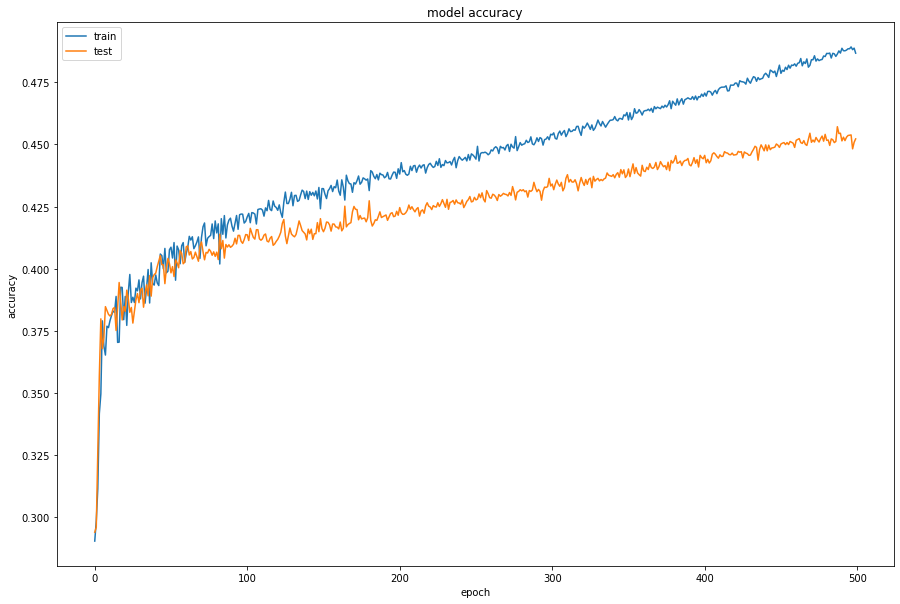

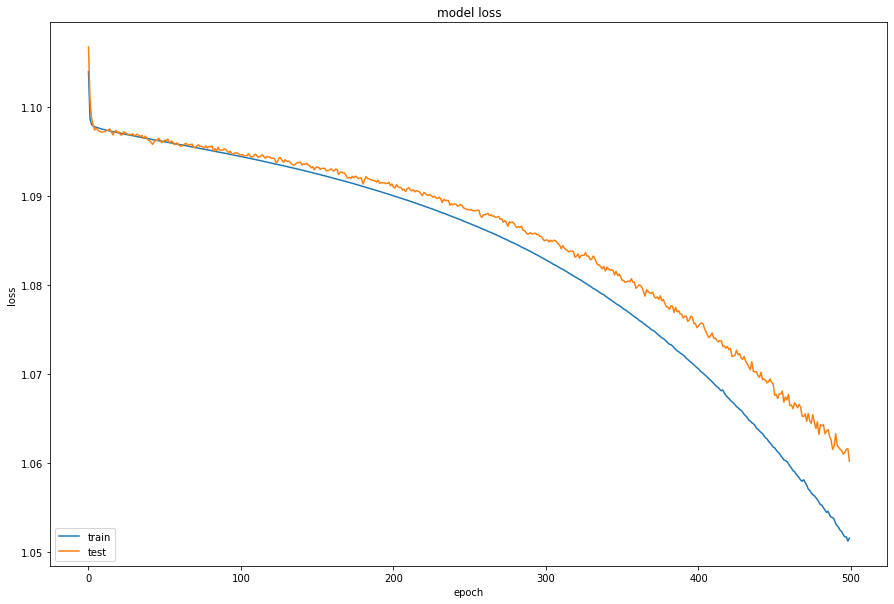

Test Metrics
Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.36      0.42      0.39      1274
           1       0.52      0.59      0.55      1721
           2       0.43      0.31      0.36      1388

    accuracy                           0.45      4383
   macro avg       0.44      0.44      0.43      4383
weighted avg       0.45      0.45      0.44      4383

Confusion Matrix


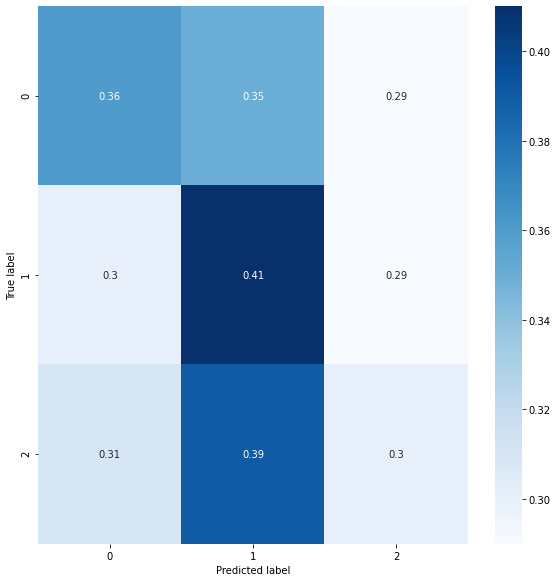

In [ ]:
#get best weights for test evaluation
model.load_weights("/content/drive/MyDrive/Colab Notebooks/weights_best_1a.hdf5")
evaluateAndGetMyMetrics(model,testX,testY)

#Question 1.c

In [ ]:
#normalize the data

oldRange = 255 - 0
newRange = 1 - (-1)

trainX_norm = ((trainX - 0) * newRange / oldRange) + (-1)
valX_norm= ((valX - 0) * newRange / oldRange) + (-1)
testX_norm=((testX - 0) * newRange / oldRange) + (-1)


In [ ]:
#rebuild the model with ReLu

model = models.Sequential(keras.layers.Flatten(input_shape = [64, 64]))
model.add(layers.Dense(256,activation='relu' ,kernel_initializer="random_uniform"))
model.add(layers.Dense(128,activation='relu', kernel_initializer="random_uniform"))
#we have 3 classes so last layer 3 neurons and softmax 
model.add(layers.Dense(3,activation='softmax', kernel_initializer="random_uniform"))
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 387       
Total params: 1,082,115
Trainable params: 1,082,115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = keras.optimizers.SGD(1e-4)

#to Keep best epoch waits
filepath="/content/drive/MyDrive/Colab Notebooks/weights_best_1c.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


model.compile(loss = "sparse_categorical_crossentropy",
optimizer =opt,
metrics = ["accuracy"])


history = model.fit(trainX_norm,
                    trainY,
                    epochs = 500,
                    validation_data = (valX_norm, valY),
                    shuffle=True,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[checkpoint])

Epoch 1/500
959/959 [==============================] - 3s 3ms/step - loss: 1.0979 - accuracy: 0.3139 - val_loss: 1.1005 - val_accuracy: 0.3195

Epoch 00001: val_accuracy improved from -inf to 0.31949, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1c.hdf5
Epoch 2/500
959/959 [==============================] - 3s 3ms/step - loss: 1.0983 - accuracy: 0.3235 - val_loss: 1.0989 - val_accuracy: 0.3278

Epoch 00002: val_accuracy improved from 0.31949 to 0.32782, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1c.hdf5
Epoch 3/500
959/959 [==============================] - 3s 3ms/step - loss: 1.0956 - accuracy: 0.3354 - val_loss: 1.0975 - val_accuracy: 0.3396

Epoch 00003: val_accuracy improved from 0.32782 to 0.33957, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1c.hdf5
Epoch 4/500
959/959 [==============================] - 3s 3ms/step - loss: 1.0959 - accuracy: 0.3460 - val_loss: 1.0963 - val_accuracy: 0.3500

Epoch 00004: val_ac

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Metrics


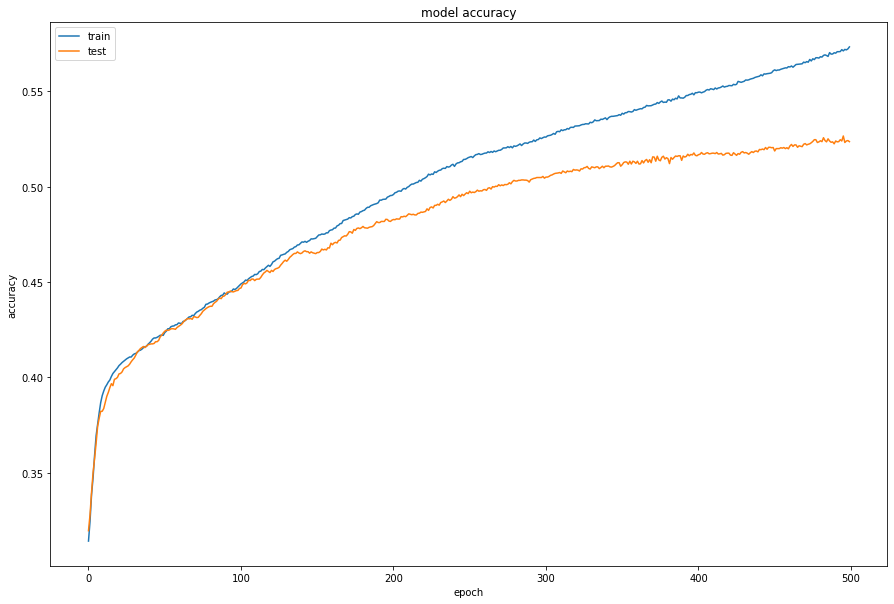

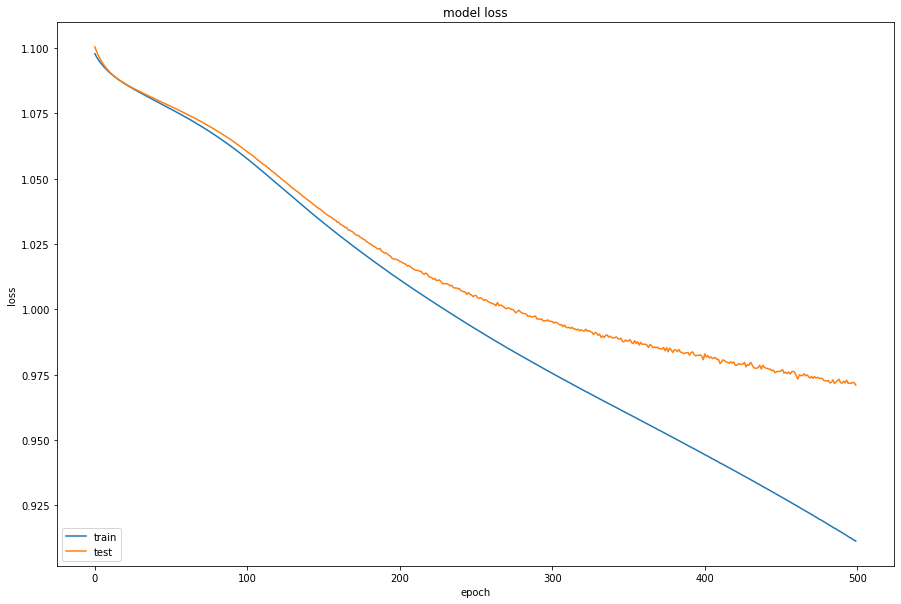

Test Metrics
Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.44      0.42      0.43      1274
           1       0.63      0.63      0.63      1721
           2       0.49      0.52      0.51      1388

    accuracy                           0.53      4383
   macro avg       0.52      0.52      0.52      4383
weighted avg       0.53      0.53      0.53      4383

Confusion Matrix


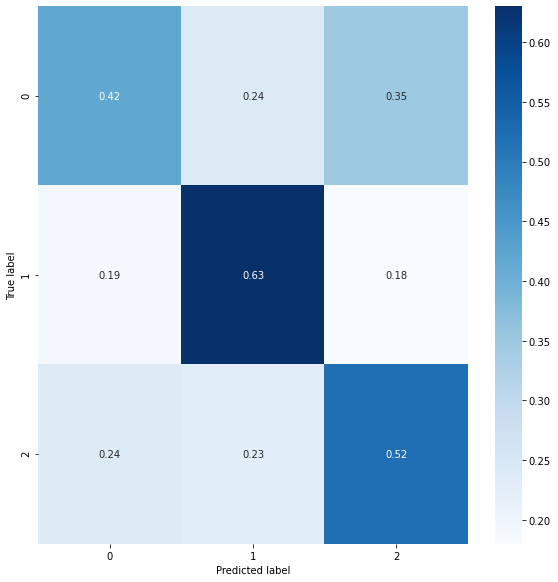

In [ ]:
#get best weights for test evaluation
model.load_weights("/content/drive/MyDrive/Colab Notebooks/weights_best_1c.hdf5")
evaluateAndGetMyMetrics(model,testX_norm,testY)

#Question 1.d

In [ ]:
model = models.Sequential(keras.layers.Flatten(input_shape = [64, 64]))
model.add(layers.Dense(256,activation='relu' ,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu', kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
#we have 3 classes so last layer 3 neurons and softmax 
model.add(layers.Dense(3,activation='softmax', kernel_initializer="random_uniform"))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               1048832   
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 387       
Total params: 1,083,651
Trainable params: 1,082,883
Non-trainable params: 768
_________________________________________

In [ ]:
opt = keras.optimizers.SGD(1e-4)

#to Keep best epoch waits
filepath="/content/drive/MyDrive/Colab Notebooks/weights_best_1d.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


model.compile(loss = "sparse_categorical_crossentropy",
optimizer =opt,
metrics = ["accuracy"])


history = model.fit(trainX_norm,
                    trainY,
                    epochs = 500,
                    validation_data = (valX_norm, valY),
                    shuffle=True,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[checkpoint])

Epoch 1/500
959/959 [==============================] - 5s 4ms/step - loss: 1.1365 - accuracy: 0.3367 - val_loss: 1.1026 - val_accuracy: 0.3749

Epoch 00001: val_accuracy improved from -inf to 0.37494, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1d.hdf5
Epoch 2/500
959/959 [==============================] - 4s 4ms/step - loss: 1.0974 - accuracy: 0.3831 - val_loss: 1.0891 - val_accuracy: 0.3992

Epoch 00002: val_accuracy improved from 0.37494 to 0.39925, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1d.hdf5
Epoch 3/500
959/959 [==============================] - 4s 4ms/step - loss: 1.0835 - accuracy: 0.4068 - val_loss: 1.0823 - val_accuracy: 0.4124

Epoch 00003: val_accuracy improved from 0.39925 to 0.41237, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1d.hdf5
Epoch 4/500
959/959 [==============================] - 4s 4ms/step - loss: 1.0778 - accuracy: 0.4170 - val_loss: 1.0773 - val_accuracy: 0.4180

Epoch 00004: val_ac

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Metrics


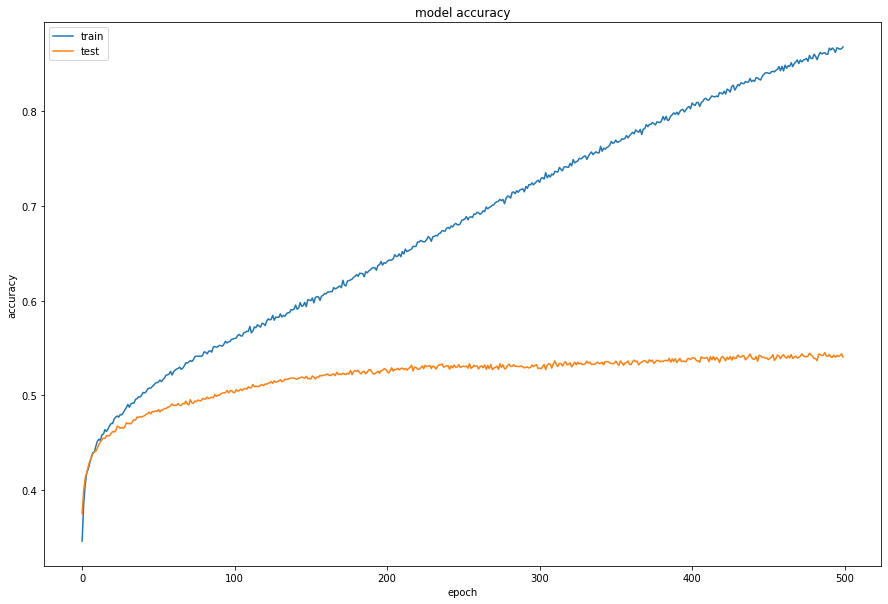

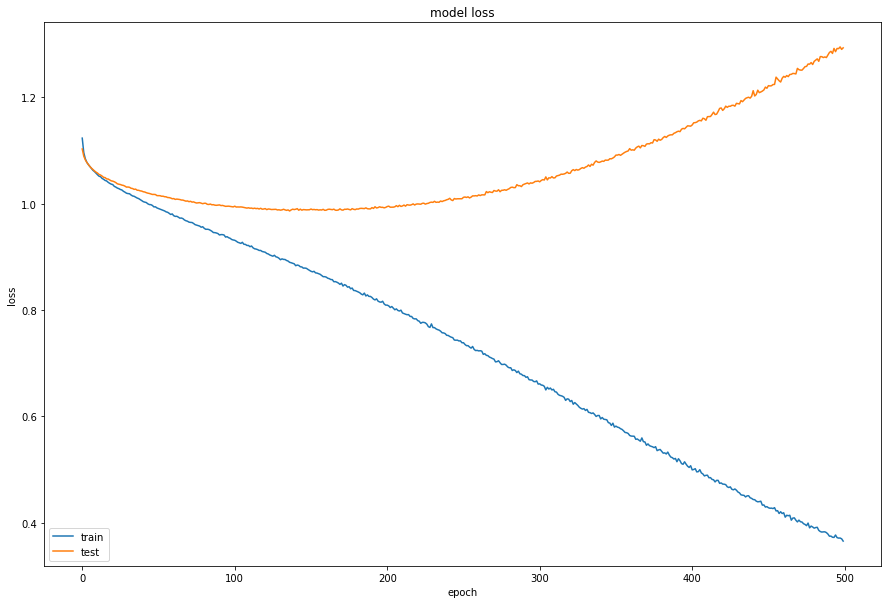

Test Metrics
Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.45      0.45      0.45      1274
           1       0.65      0.62      0.63      1721
           2       0.47      0.50      0.49      1388

    accuracy                           0.53      4383
   macro avg       0.52      0.52      0.52      4383
weighted avg       0.53      0.53      0.53      4383

Confusion Matrix


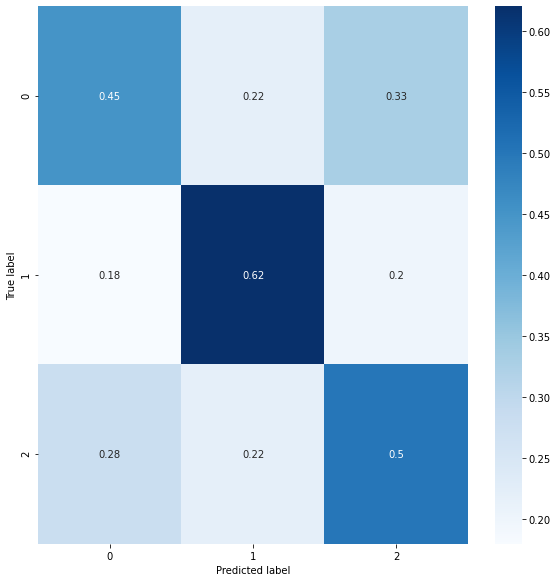

In [ ]:
#get best weights for test evaluation
model.load_weights("/content/drive/MyDrive/Colab Notebooks/weights_best_1d.hdf5")
evaluateAndGetMyMetrics(model,testX_norm,testY)

In [ ]:
#trying batch norm BEFORE activation functions

model = models.Sequential(keras.layers.Flatten(input_shape = [64, 64]))

model.add(layers.Dense(256,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Dense(128,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

#we have 3 classes so last layer 3 neurons and softmax 
model.add(layers.Dense(3,activation='softmax', kernel_initializer="random_uniform"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1048832   
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
activation_6 (Activation)    (None, 128)              

In [ ]:
opt = keras.optimizers.SGD(1e-4)

#to Keep best epoch waits
filepath="/content/drive/MyDrive/Colab Notebooks/weights_best_1dBEFORE_ACTIVATION.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


model.compile(loss = "sparse_categorical_crossentropy",
optimizer =opt,
metrics = ["accuracy"])


history = model.fit(trainX_norm,
                    trainY,
                    epochs = 500,
                    validation_data = (valX_norm, valY),
                    shuffle=True,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[checkpoint])

Epoch 1/500
959/959 [==============================] - 6s 4ms/step - loss: 1.1058 - accuracy: 0.3507 - val_loss: 1.0971 - val_accuracy: 0.3623

Epoch 00001: val_accuracy improved from -inf to 0.36228, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1dBEFORE_ACTIVATION.hdf5
Epoch 2/500
959/959 [==============================] - 4s 4ms/step - loss: 1.0947 - accuracy: 0.3669 - val_loss: 1.0917 - val_accuracy: 0.3783

Epoch 00002: val_accuracy improved from 0.36228 to 0.37825, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1dBEFORE_ACTIVATION.hdf5
Epoch 3/500
959/959 [==============================] - 3s 4ms/step - loss: 1.0873 - accuracy: 0.3833 - val_loss: 1.0879 - val_accuracy: 0.3864

Epoch 00003: val_accuracy improved from 0.37825 to 0.38635, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1dBEFORE_ACTIVATION.hdf5
Epoch 4/500
959/959 [==============================] - 3s 3ms/step - loss: 1.0870 - accuracy: 0.3832 - val_loss:

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Metrics


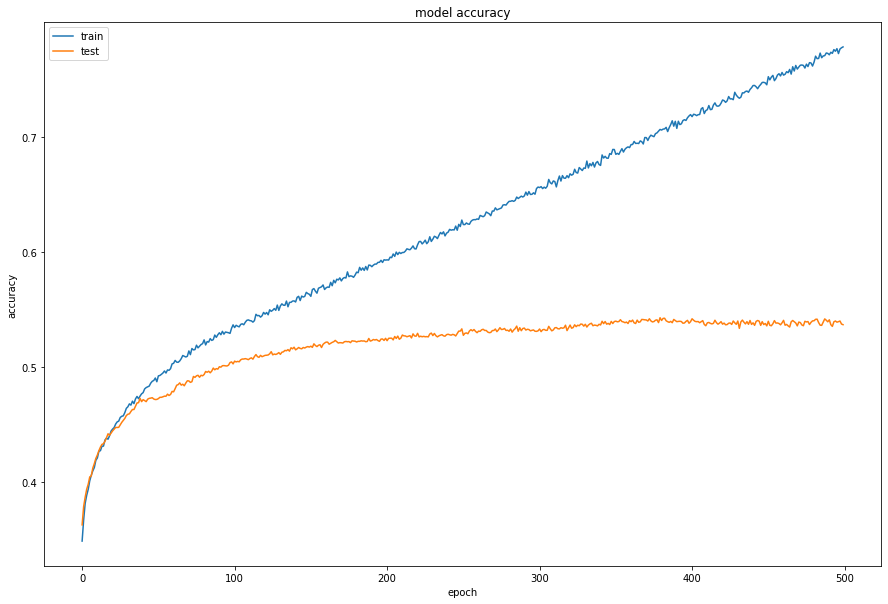

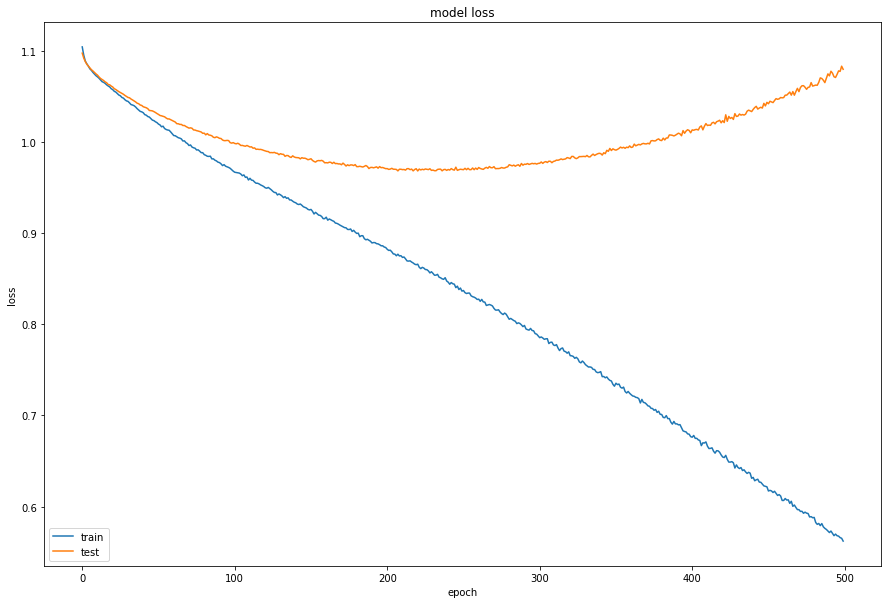

Test Metrics
Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      1274
           1       0.66      0.62      0.64      1721
           2       0.46      0.49      0.48      1388

    accuracy                           0.54      4383
   macro avg       0.53      0.53      0.53      4383
weighted avg       0.54      0.54      0.54      4383

Confusion Matrix


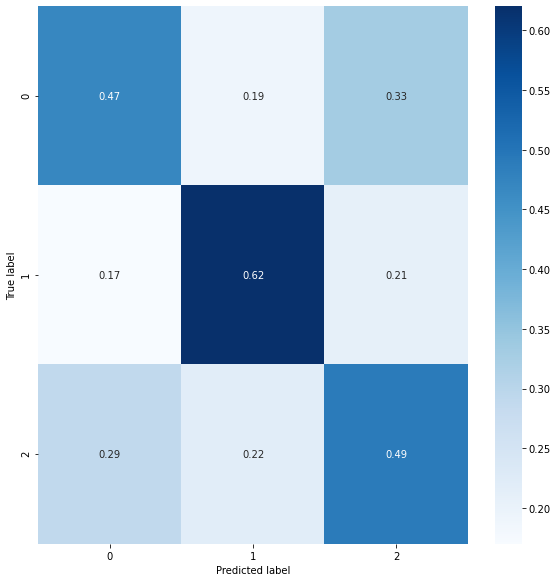

In [ ]:
#get best weights for test evaluation
model.load_weights("/content/drive/MyDrive/Colab Notebooks/weights_best_1dBEFORE_ACTIVATION.hdf5")
evaluateAndGetMyMetrics(model,testX_norm,testY)

#Question 1.e: First

In [ ]:
model = models.Sequential(keras.layers.Flatten(input_shape = [64, 64]))

model.add(layers.Dense(1024,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(512,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(512,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(512,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

#we have 3 classes so last layer 3 neurons and softmax 
model.add(layers.Dense(3,activation='softmax', kernel_initializer="random_uniform"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              4195328   
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_7 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
activation_8 (Activation)    (None, 512)              

In [ ]:
opt = keras.optimizers.SGD(1e-4)

#to Keep best epoch waits
filepath="/content/drive/MyDrive/Colab Notebooks/weights_best_1eDEEP.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


model.compile(loss = "sparse_categorical_crossentropy",
optimizer =opt,
metrics = ["accuracy"])


history = model.fit(trainX_norm,
                    trainY,
                    epochs = 500,
                    validation_data = (valX_norm, valY),
                    shuffle=True,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[checkpoint])

Epoch 1/500
959/959 [==============================] - 6s 5ms/step - loss: 1.1591 - accuracy: 0.3664 - val_loss: 1.0939 - val_accuracy: 0.4016

Epoch 00001: val_accuracy improved from -inf to 0.40164, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eDEEP.hdf5
Epoch 2/500
959/959 [==============================] - 5s 5ms/step - loss: 1.0919 - accuracy: 0.4100 - val_loss: 1.0745 - val_accuracy: 0.4241

Epoch 00002: val_accuracy improved from 0.40164 to 0.42412, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eDEEP.hdf5
Epoch 3/500
959/959 [==============================] - 5s 5ms/step - loss: 1.0698 - accuracy: 0.4304 - val_loss: 1.0628 - val_accuracy: 0.4345

Epoch 00003: val_accuracy improved from 0.42412 to 0.43450, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eDEEP.hdf5
Epoch 4/500
959/959 [==============================] - 5s 5ms/step - loss: 1.0650 - accuracy: 0.4364 - val_loss: 1.0549 - val_accuracy: 0.4467

Epoch 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Metrics


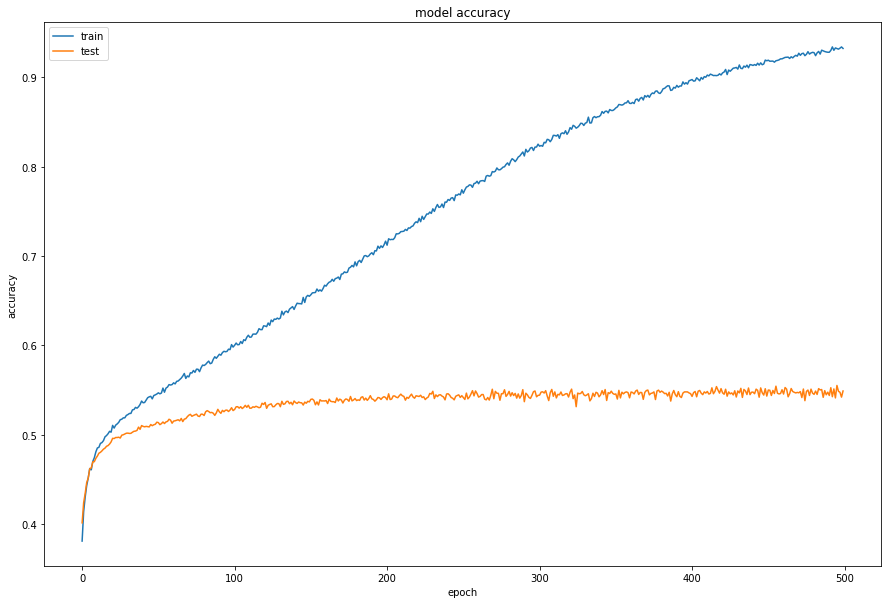

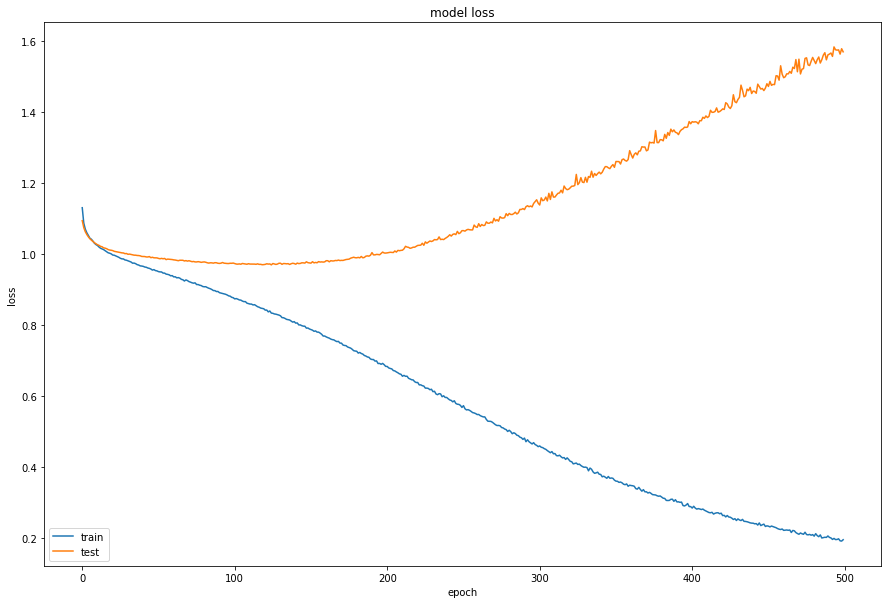

Test Metrics
Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.48      0.45      0.47      1274
           1       0.65      0.63      0.64      1721
           2       0.48      0.52      0.50      1388

    accuracy                           0.54      4383
   macro avg       0.54      0.54      0.54      4383
weighted avg       0.55      0.54      0.55      4383

Confusion Matrix


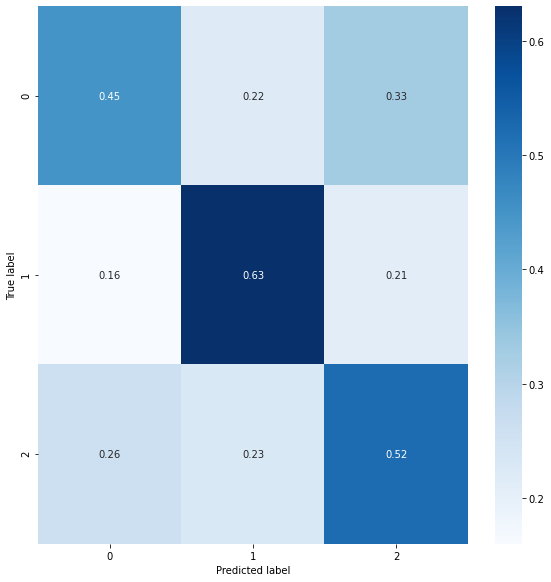

In [ ]:
#get best weights for test evaluation
model.load_weights("/content/drive/MyDrive/Colab Notebooks/weights_best_1eDEEP.hdf5")
evaluateAndGetMyMetrics(model,testX_norm,testY)

#Question 1.e: Second

In [ ]:
#same model but diff optimizersss
model = models.Sequential(keras.layers.Flatten(input_shape = [64, 64]))

model.add(layers.Dense(1024,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(512,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(512,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(512,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

#we have 3 classes so last layer 3 neurons and softmax 
model.add(layers.Dense(3,activation='softmax', kernel_initializer="random_uniform"))

opt = keras.optimizers.Adam(1e-2)

#to Keep best epoch waits
filepath="/content/drive/MyDrive/Colab Notebooks/weights_best_1eSecondDEEP.hdf5"

#callbacks
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=1e-5,verbose=1)
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model.compile(loss = "sparse_categorical_crossentropy",
optimizer =opt,
metrics = ["accuracy"])


history = model.fit(trainX_norm,
                    trainY,
                    epochs = 500,
                    validation_data = (valX_norm, valY),
                    shuffle=True,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[checkpoint,reduce_lr,stop])



Epoch 1/500
959/959 [==============================] - 7s 6ms/step - loss: 1.2356 - accuracy: 0.3795 - val_loss: 1.0151 - val_accuracy: 0.4866

Epoch 00001: val_accuracy improved from -inf to 0.48665, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eSecondDEEP.hdf5
Epoch 2/500
959/959 [==============================] - 5s 5ms/step - loss: 1.0244 - accuracy: 0.4776 - val_loss: 0.9951 - val_accuracy: 0.5067

Epoch 00002: val_accuracy improved from 0.48665 to 0.50673, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eSecondDEEP.hdf5
Epoch 3/500
959/959 [==============================] - 6s 6ms/step - loss: 0.9982 - accuracy: 0.4982 - val_loss: 0.9802 - val_accuracy: 0.5107

Epoch 00003: val_accuracy improved from 0.50673 to 0.51073, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eSecondDEEP.hdf5
Epoch 4/500
959/959 [==============================] - 6s 6ms/step - loss: 0.9792 - accuracy: 0.5143 - val_loss: 0.9983 - val_accurac

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Metrics


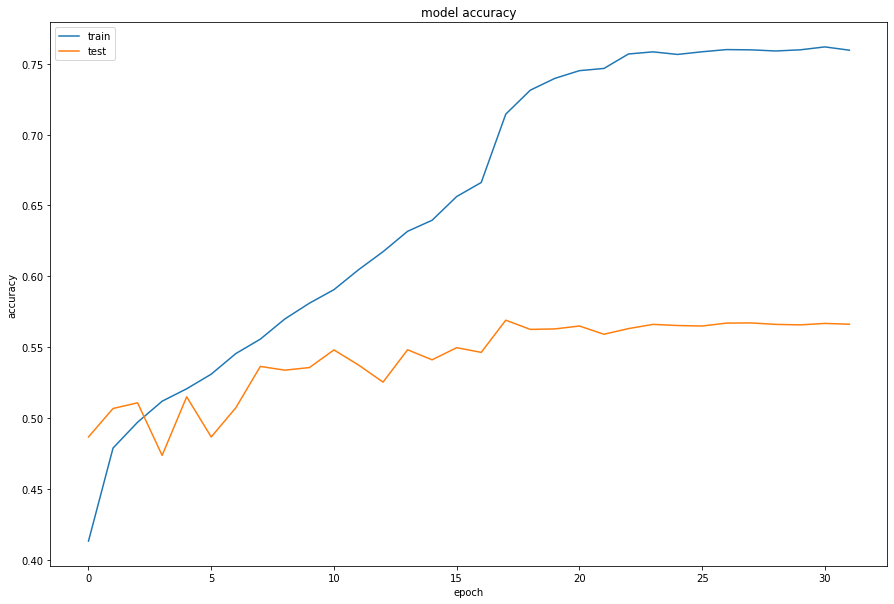

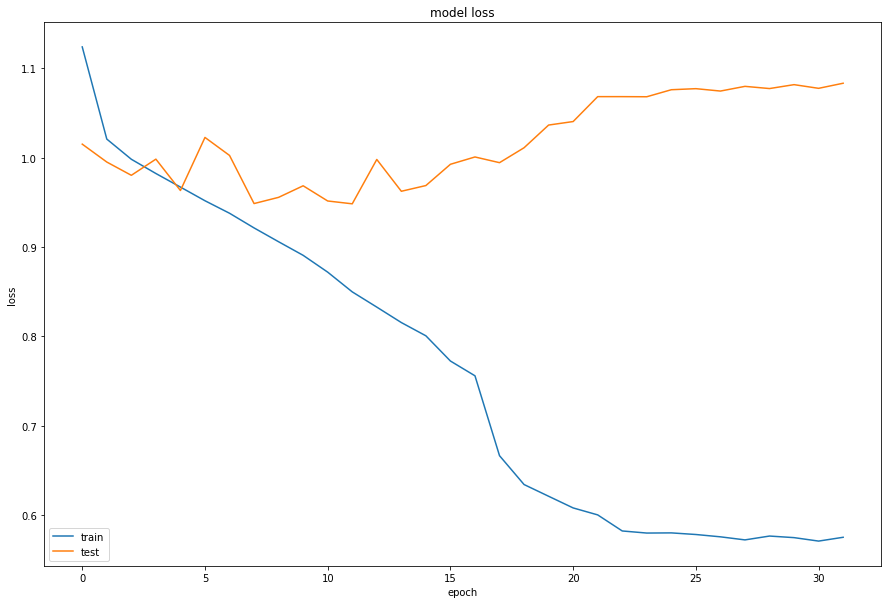

Test Metrics
Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.49      0.45      0.47      1274
           1       0.69      0.67      0.68      1721
           2       0.49      0.55      0.52      1388

    accuracy                           0.57      4383
   macro avg       0.56      0.56      0.56      4383
weighted avg       0.57      0.57      0.57      4383

Confusion Matrix


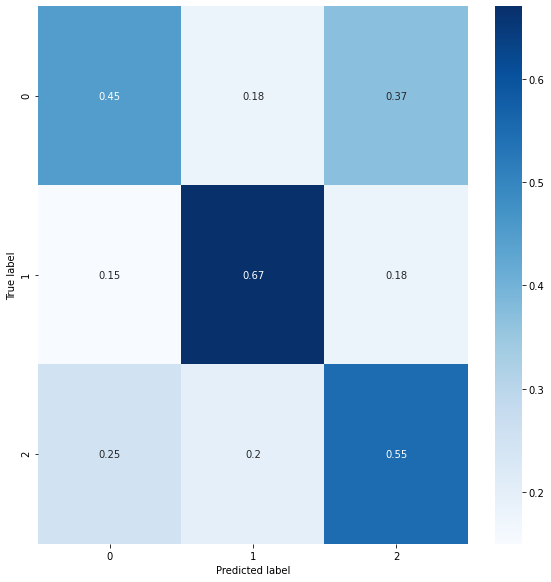

In [ ]:
#get best weights for test evaluation
model.load_weights("/content/drive/MyDrive/Colab Notebooks/weights_best_1eSecondDEEP.hdf5")
evaluateAndGetMyMetrics(model,testX_norm,testY)

#Question 1.e: Third

In [ ]:
#same model but diff optimizersss
model = models.Sequential(keras.layers.Flatten(input_shape = [64, 64]))


model.add(layers.Dense(2048,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(1024,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(512,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

model.add(layers.Dense(256,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))


model.add(layers.Dense(256,kernel_initializer="random_uniform"))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))

#we have 3 classes so last layer 3 neurons and softmax 
model.add(layers.Dense(3,activation='softmax', kernel_initializer="random_uniform"))
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
batch_normalization_43 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_43 (Activation)   (None, 2048)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_44 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_44 (Activation)   (None, 1024)             

In [ ]:
opt = keras.optimizers.Adam(1e-2)

#to Keep best epoch waits
filepath="/content/drive/MyDrive/Colab Notebooks/weights_best_1eThirddDEEP.hdf5"

#callbacks
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=1e-6,verbose=1)
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

model.compile(loss = "sparse_categorical_crossentropy",
optimizer =opt,
metrics = ["accuracy"])


history = model.fit(trainX_norm,
                    trainY,
                    epochs = 500,
                    validation_data = (valX_norm, valY),
                    shuffle=True,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[checkpoint,reduce_lr,stop])



Epoch 1/500
959/959 [==============================] - 9s 8ms/step - loss: 1.1566 - accuracy: 0.3769 - val_loss: 1.0263 - val_accuracy: 0.4764

Epoch 00001: val_loss improved from inf to 1.02627, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eThirddDEEP.hdf5
Epoch 2/500
959/959 [==============================] - 7s 7ms/step - loss: 1.0262 - accuracy: 0.4781 - val_loss: 0.9979 - val_accuracy: 0.5003

Epoch 00002: val_loss improved from 1.02627 to 0.99794, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eThirddDEEP.hdf5
Epoch 3/500
959/959 [==============================] - 7s 7ms/step - loss: 0.9985 - accuracy: 0.4941 - val_loss: 0.9966 - val_accuracy: 0.4926

Epoch 00003: val_loss improved from 0.99794 to 0.99662, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eThirddDEEP.hdf5
Epoch 4/500
959/959 [==============================] - 7s 7ms/step - loss: 0.9805 - accuracy: 0.5082 - val_loss: 0.9553 - val_accuracy: 0.5309

Ep

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Metrics


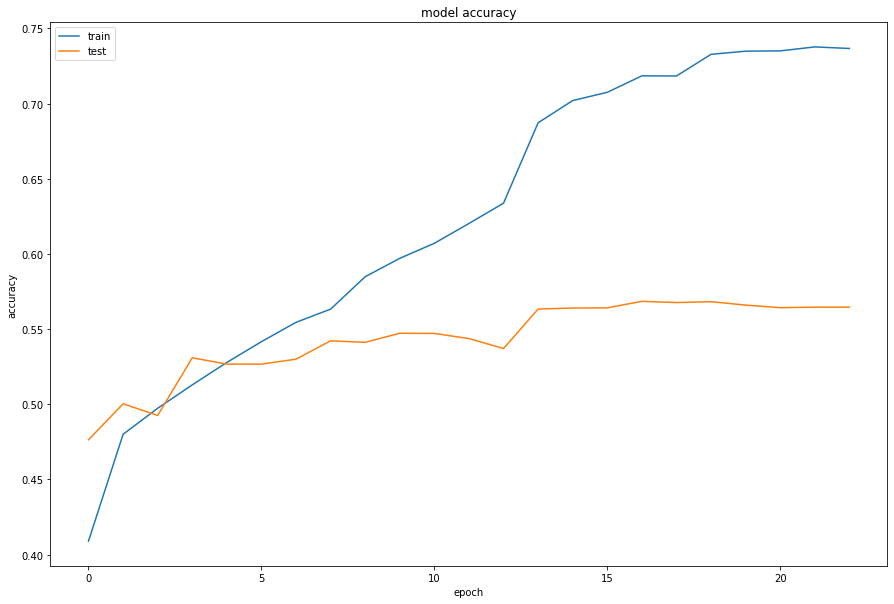

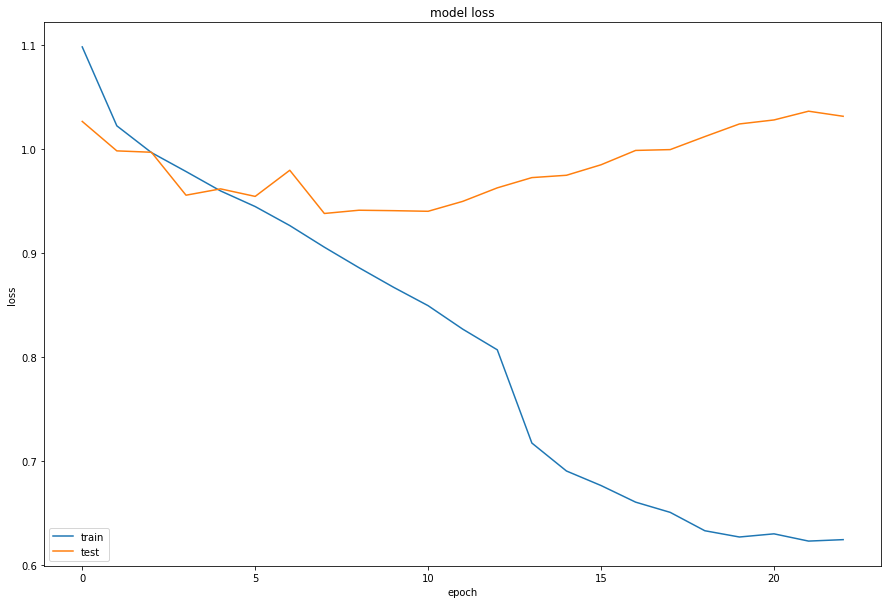

Test Metrics
Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.43      0.43      0.43      1274
           1       0.72      0.58      0.64      1721
           2       0.48      0.59      0.53      1388

    accuracy                           0.54      4383
   macro avg       0.54      0.53      0.53      4383
weighted avg       0.56      0.54      0.54      4383

Confusion Matrix


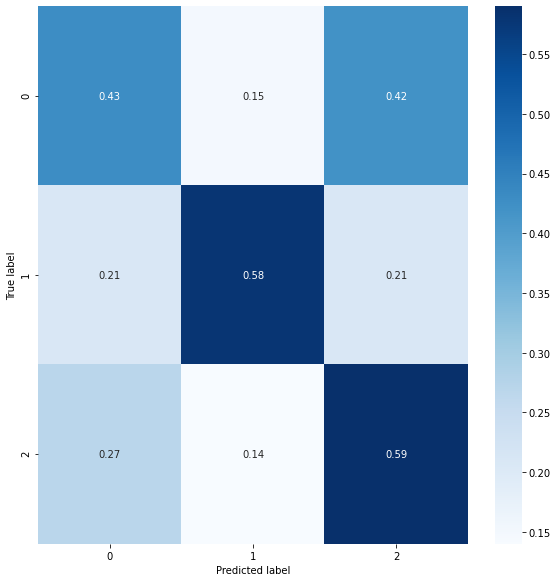

In [ ]:
#get best weights for test evaluation
model.load_weights("/content/drive/MyDrive/Colab Notebooks/weights_best_1eThirddDEEP.hdf5")
evaluateAndGetMyMetrics(model,testX_norm,testY)

#Question:1e Fourth

In [ ]:
#same model but diff optimizersss
model = models.Sequential(keras.layers.Flatten(input_shape = [64, 64]))


model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(layers.Dropout(0.5))

#we have 3 classes so last layer 3 neurons and softmax 
model.add(layers.Dense(3,activation='softmax'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 2048)              8390656   
_________________________________________________________________
batch_normalization_54 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_54 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_64 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_55 (Batc (None, 1024)             

In [ ]:
opt = keras.optimizers.Adam(1e-2)

#to Keep best epoch waits
filepath="/content/drive/MyDrive/Colab Notebooks/weights_best_1eFourthDEEP.hdf5"

#callbacks
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=1e-6,verbose=1)
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

model.compile(loss = "sparse_categorical_crossentropy",
optimizer =opt,
metrics = ["accuracy"])


history = model.fit(trainX_norm,
                    trainY,
                    epochs = 500,
                    validation_data = (valX_norm, valY),
                    shuffle=True,
                    batch_size=32,
                    class_weight=class_weight_dict,
                    callbacks=[checkpoint,reduce_lr,stop])

Epoch 1/500
959/959 [==============================] - 9s 8ms/step - loss: 1.2966 - accuracy: 0.3533 - val_loss: 1.0878 - val_accuracy: 0.3988

Epoch 00001: val_loss improved from inf to 1.08776, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eFourthDEEP.hdf5
Epoch 2/500
959/959 [==============================] - 8s 8ms/step - loss: 1.0735 - accuracy: 0.4270 - val_loss: 1.0274 - val_accuracy: 0.4650

Epoch 00002: val_loss improved from 1.08776 to 1.02741, saving model to /content/drive/MyDrive/Colab Notebooks/weights_best_1eFourthDEEP.hdf5
Epoch 3/500
959/959 [==============================] - 8s 8ms/step - loss: 1.0387 - accuracy: 0.4695 - val_loss: 1.0383 - val_accuracy: 0.4717

Epoch 00003: val_loss did not improve from 1.02741
Epoch 4/500
959/959 [==============================] - 8s 8ms/step - loss: 1.0314 - accuracy: 0.4717 - val_loss: 1.0257 - val_accuracy: 0.4852

Epoch 00004: val_loss improved from 1.02741 to 1.02565, saving model to /content/drive/MyDriv

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Metrics


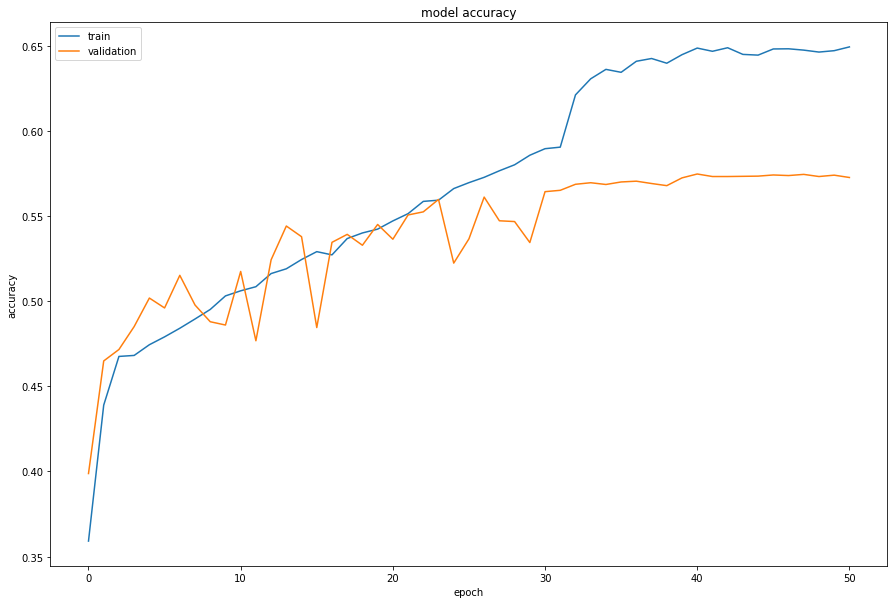

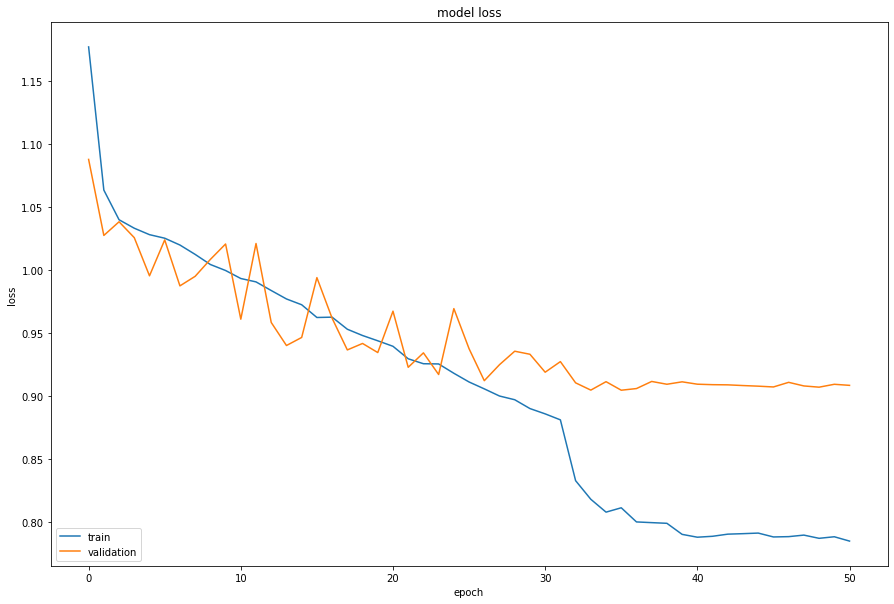

Test Metrics
Classification Report for Test Dataset
              precision    recall  f1-score   support

           0       0.48      0.44      0.46      1274
           1       0.74      0.65      0.69      1721
           2       0.49      0.61      0.55      1388

    accuracy                           0.57      4383
   macro avg       0.57      0.56      0.56      4383
weighted avg       0.59      0.57      0.58      4383

Confusion Matrix


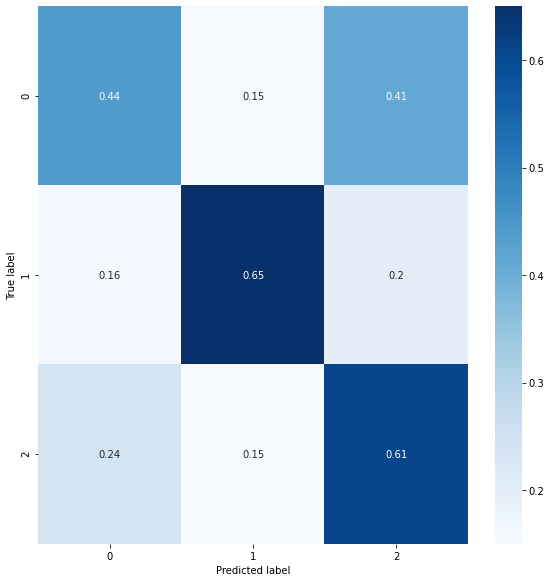

In [ ]:
#get best weights for test evaluation
model.load_weights("/content/drive/MyDrive/Colab Notebooks/weights_best_1eFourthDEEP.hdf5")
evaluateAndGetMyMetrics(model,testX_norm,testY)